In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint as pp

# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

605

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key

# Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
test_city = 'montreal'

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
test = f"{url}appid={api_key}&units={units}&q={test_city}"

response = requests.get(test).json()
pp(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 45.5, 'lon': -73.61},
 'dt': 1533682800,
 'id': 6077243,
 'main': {'humidity': 65,
          'pressure': 1011,
          'temp': 26.65,
          'temp_max': 27,
          'temp_min': 26},
 'name': 'Montreal',
 'sys': {'country': 'CA',
         'id': 3829,
         'message': 0.0048,
         'sunrise': 1533635197,
         'sunset': 1533687163,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 4.6}}


In [4]:
# DataFrame creation with all required information
weather_data = pd.DataFrame({'City Name': cities,
                             'Name': '',
                             'Country': '',
                             'Latitude': '',
                             'Temperature (C)': '',
                             'Humidity': '',
                             'Cloud Cover (%)': '',
                             'Wind Speed (km/h)': ''})
weather_data.head()

,City Name,Name,Country,Latitude,Temperature (C),Humidity,Cloud Cover (%),Wind Speed (km/h)
0,buchanan,,,,,,,
1,busselton,,,,,,,
2,kavieng,,,,,,,
3,mullaitivu,,,,,,,
4,chokurdakh,,,,,,,


In [5]:
# Loop API requests for each city in DataFrame to get all the relevant data
for index, city in weather_data.iterrows():
    response = requests.get(query_url + city[0]).json()
    print({index},'-',{city[0]})
    try:
        weather_data.loc[index, 'Name'] = response['name']
        weather_data.loc[index, 'Country'] = response['sys']['country']
        weather_data.loc[index, 'Latitude'] = response['coord']['lat']
        weather_data.loc[index, 'Temperature (C)'] = response['main']['temp']
        weather_data.loc[index, 'Humidity'] = response['main']['humidity']
        weather_data.loc[index, 'Cloud Cover (%)'] = response['clouds']['all']
        weather_data.loc[index, 'Wind Speed (km/h)'] = response['wind']['speed']
    except KeyError:
        print(f"--- Skipping ", {city[0]})
        pass

print('----------------------')
print('Complete')

# for city in cities:
#     response = requests.get(query_url + city).json()
#     temp.append(response['main']['temp'])
#     hum.append(response['main']['humidity'])
#     cloud.append(response['clouds']['all'])
#     wnd_spd.append(response['wind']['speed'])
    
# print(f"The tempurature is: {temp}")
# print(f"The humidity is: {hum}")
# print(f"The cloud cover is: {cloud}")
# print(f"The wind speed is: {wnd_spd}")

{0} - {'buchanan'}
{1} - {'busselton'}
{2} - {'kavieng'}
{3} - {'mullaitivu'}
--- Skipping  {'mullaitivu'}
{4} - {'chokurdakh'}
{5} - {'cidreira'}
{6} - {'tsihombe'}
--- Skipping  {'tsihombe'}
{7} - {'puerto escondido'}
{8} - {'nepalganj'}
--- Skipping  {'nepalganj'}
{9} - {'barentsburg'}
--- Skipping  {'barentsburg'}
{10} - {'talnakh'}
{11} - {'rikitea'}
{12} - {'hampton'}
{13} - {'zhigalovo'}
{14} - {'bambous virieux'}
{15} - {'roald'}
{16} - {'nikolskoye'}
{17} - {'vao'}
{18} - {'port elizabeth'}
{19} - {'victoria'}
{20} - {'souillac'}
{21} - {'lebu'}
{22} - {'caravelas'}
{23} - {'bredasdorp'}
{24} - {'qaanaaq'}
{25} - {'amderma'}
--- Skipping  {'amderma'}
{26} - {'severo-kurilsk'}
{27} - {'kapaa'}
{28} - {'te anau'}
{29} - {'ushuaia'}
{30} - {'mataura'}
{31} - {'jamestown'}
{32} - {'saucillo'}
{33} - {'yumen'}
{34} - {'danville'}
{35} - {'bathsheba'}
{36} - {'puerto ayora'}
{37} - {'itoman'}
{38} - {'palu'}
{39} - {'bethel'}
{40} - {'hithadhoo'}
{41} - {'castro'}
{42} - {'paradwip'

In [6]:
# Update the weather_data DataFrame with the data
weather_data = pd.DataFrame({'City': weather_data['Name'],
                             'Country': weather_data['Country'],
                             'Latitude': weather_data['Latitude'],
                             'Temperature (C)': weather_data['Temperature (C)'],
                             'Humidity': weather_data['Humidity'],
                             'Cloud Cover (%)': weather_data['Cloud Cover (%)'],
                             'Wind Speed (km/h)': weather_data['Wind Speed (km/h)']})

# Data clean up
weather_data['Temperature (C)'].replace('', np.nan, inplace=True)
weather_data.dropna(subset=['Temperature (C)'], how='any', inplace=True)

weather_data.to_csv('Analysis/Weather_Data.csv', index=False)

weather_data.head()

,City,Country,Latitude,Temperature (C),Humidity,Cloud Cover (%),Wind Speed (km/h)
0,Buchanan,LR,5.88,23.00,94,75,4.39
1,Busselton,AU,-33.64,16.33,97,92,9.64
2,Kavieng,PG,-2.57,28.23,100,44,3.01
4,Chokurdakh,RU,70.62,5.43,88,0,3.71
5,Cidreira,BR,-30.17,13.48,89,0,6.24


## Latitude vs Temperature Plot

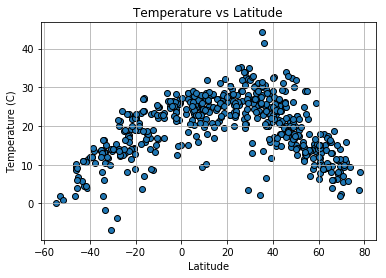

In [7]:
# Scatter Plot creation
lat_temp = plt.scatter(weather_data['Latitude'], weather_data['Temperature (C)'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid()

# Save Figure
plt.savefig('Analysis/Temperature_vs_Latitude.png', dpi=350)
plt.show()

## Latitude vs. Humidity Plot

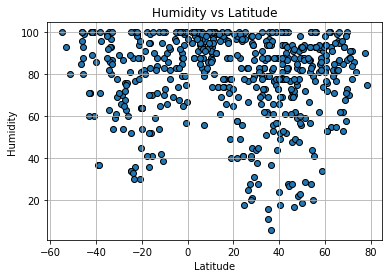

In [8]:
# Scatter Plot creation
lat_hum = plt.scatter(weather_data['Latitude'], weather_data['Humidity'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save Figure
plt.savefig('Analysis/Humidity_vs_Latitude.png', dpi=350)
plt.show()

## Latitude vs. Cloudiness Plot

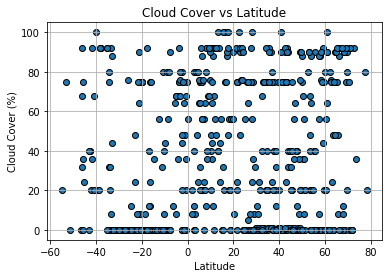

In [9]:
# Scatter Plot creation
lat_hum = plt.scatter(weather_data['Latitude'], weather_data['Cloud Cover (%)'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Cloud Cover vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.grid()

# Save Figure
plt.savefig('Analysis/CloudCover_vs_Latitude.png', dpi=350)
plt.show()

## Latitude vs. Wind Speed Plot

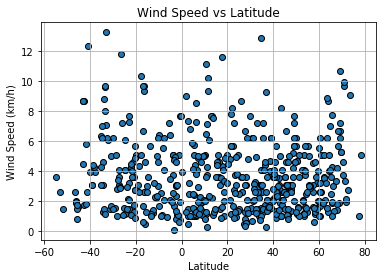

In [10]:
# Scatter Plot creation
lat_hum = plt.scatter(weather_data['Latitude'], weather_data['Wind Speed (km/h)'], marker='o', edgecolors='black')

# Figure formatting
plt.gcf().set_facecolor('white')
plt.title('Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.grid()

# Save Figure
plt.savefig('Analysis/WindSpeed_vs_Latitude.png', dpi=350)
plt.show()

## Analysis

From the Temperature vs Latitude scatter plot, we can not only confirm that it is indeed much warmer near the equator, we can also observe that the warmth is tilted north due to the northern hemisphere being in the summer.
From the Wind Speed vs Latitude scatter plot, we can observe slightly higher wind speeds in the northern hemisphere. This may be due to higher temperatures causing higher winds.
We can also observe from the Humidity vs Latitude plot that the higher temperature in the upper hemisphere also increases humidity.
In the Coud Cover vs Latitude plot we can only observe that clear skies are very common.